**GlucoWise - Diabetes Prediction using ML**

dataset: National Institute of Diabetes and Digestive and Kidney Diseases (Kaggle.com)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading csv from github
df = pd.read_csv('https://raw.githubusercontent.com/Harsh-Thorat/GlucoWise-ME781/main/1.%20diabetes.csv')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Cleaning data
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
#checking NAN values
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#replacing missing values with median values
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [ ]:
#descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


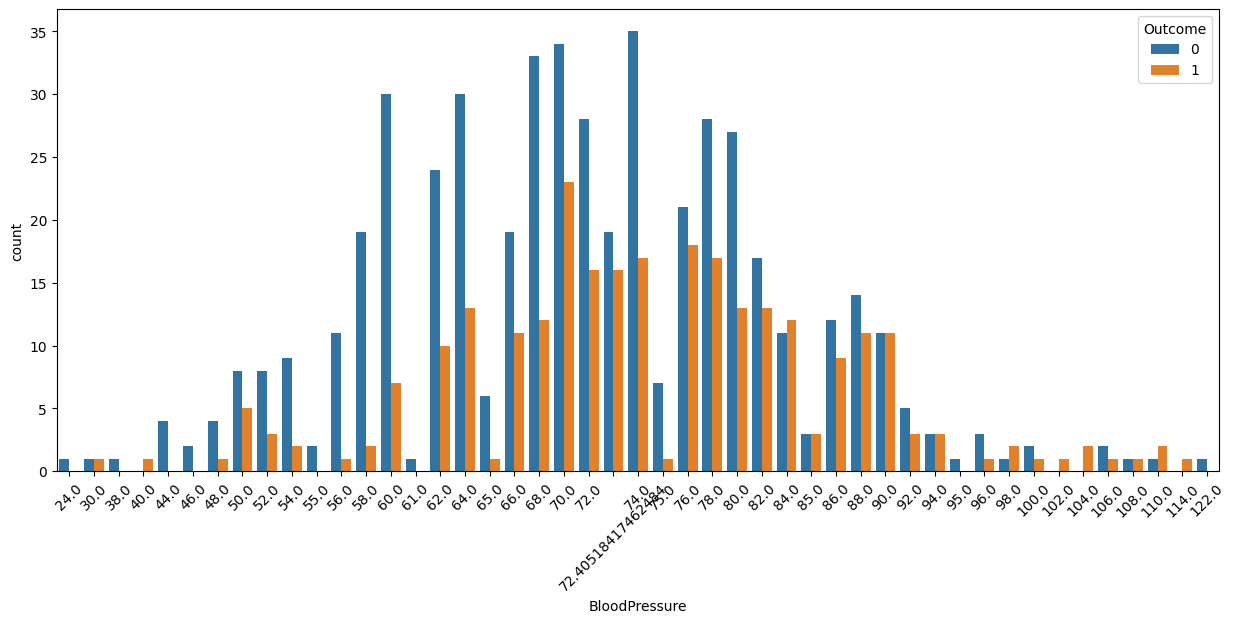

In [ ]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df, x='BloodPressure', hue='Outcome')
plt.xticks(rotation=45)

plt.show()

In [ ]:
#correlation of the factors with Diabetes('outcome')
df_corr = df.corr()['Outcome']

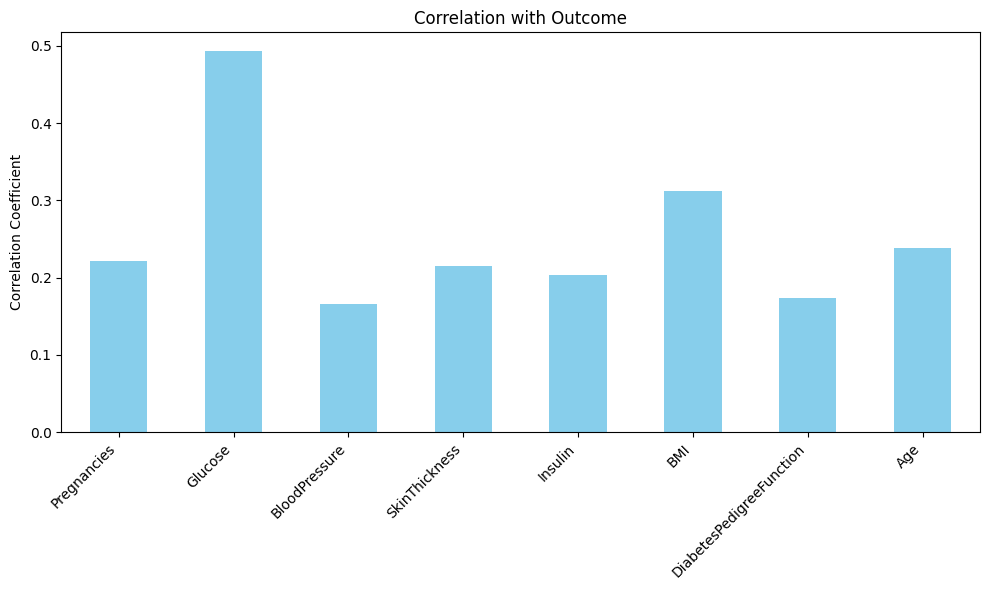

In [ ]:
plt.figure(figsize=(10, 6))
df_corr.drop('Outcome').plot(kind='bar', color='skyblue')
plt.title('Correlation with Outcome')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right') #rotating x-axis
plt.tight_layout()
plt.show()

#USING SVM CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# scaler= MinMaxScaler()
clf = svm.SVC(kernel='linear')

In [ ]:
df_new=df[df['Insulin']>0]#dropping rows where insulin value is 0

In [ ]:
X = df_new.drop('Outcome',axis=1)
# X_scaled=scaler.fit_transform(X.to_numpy())
y = df_new['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [ ]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test, y_pred,)

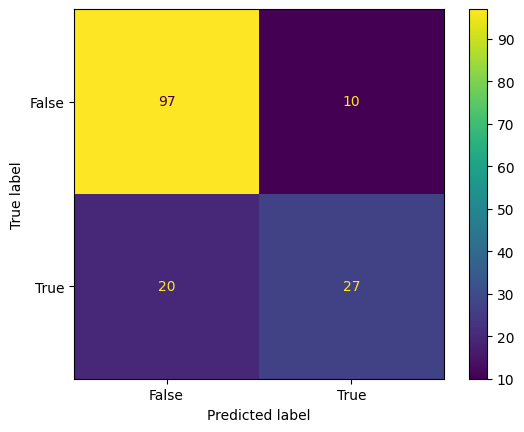

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()
#confusion matrix

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


#Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7727272727272727


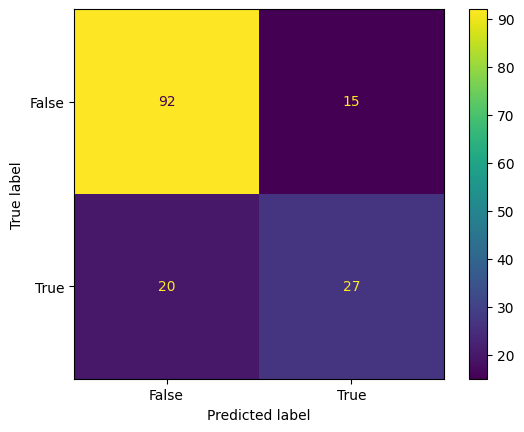

In [ ]:
cm=confusion_matrix(y_test, y_pred,)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()
#cinfusion matrix

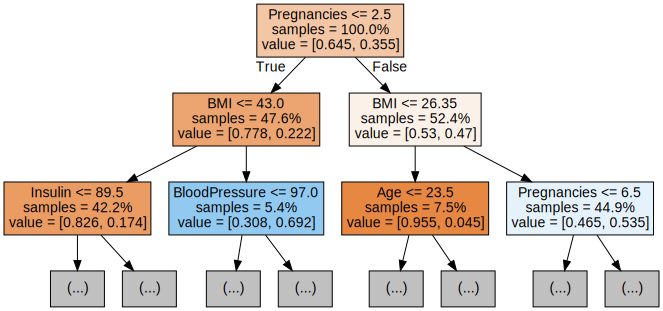

In [ ]:
for i in range(1):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
#plotting the first tree out of 100 tree classifiers

### USING GRADIO FOR WEB INTERFACE

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.5 MB

In [ ]:
import gradio as gr
import numpy as np

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_features = [float(Pregnancies), float(Glucose), float(BloodPressure), float(SkinThickness), float(Insulin),
                      float(BMI), float(DiabetesPedigreeFunction), float(Age)]

    parameter_names = {
        "pregnancies": "Pregnancies",
        "glucose": "Glucose",
        "blood_pressure": "Blood Pressure",
        "skin_thickness": "Skin Thickness",
        "insulin": "Insulin",
        "bmi": "BMI",
        "diabetes_pedigree_function": "Diabetes Pedigree Function",
        "age": "Age"
    }

    parameters_text = "\n".join([f"{parameter_names[param]}: {value}" for param, value in zip(parameter_names.keys(), input_features)])

    prediction = rf.predict([input_features])[0]

    result_text = f"Prediction: {'Likely Diabetic' if prediction == 1 else 'Likely Non-Diabetic'}\n\nInput Parameters:\n{parameters_text}"
    return result_text
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Textbox("Number of Pregnancies Ex.3", placeholder=""),
        gr.Textbox("Glucose Level Ex.148", placeholder=""),
        gr.Textbox("Blood Pressure Ex.72", placeholder=""),
        gr.Textbox("Skin Thickness Ex. 35", placeholder=""),
        gr.Textbox("Insulin level Ex. 125", placeholder=""),
        gr.Textbox("BMI (Ex. 33.6)", placeholder=""),
        gr.Textbox("Diabetes pedigree function, Ex.0.627", placeholder=""),
        gr.Textbox("Age Ex. 40", placeholder="")
    ],
    outputs=gr.Textbox(),
    title="Diabetes Prediction",
    description="Enter your details below to predict the likelihood of having diabetes."
)

iface.launch(share=True)

ModuleNotFoundError: ignored